In [52]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy

In [53]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [54]:
# path folder
path = r'C:\Users\alexp\UFC Stats'
path

'C:\\Users\\alexp\\UFC Stats'

In [55]:
# import clean UFC data
df_ufc_4 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_ufc_clean_v4.csv'), index_col = 0)

In [56]:
pd.set_option('display.max_columns', None)

In [57]:
df_ufc_4.head(20)

,red_fighter,blue_fighter,date,location,winner,title_bout,weight_class,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,B_avg_SUB_ATT,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_SIG_STR_pct,R_avg_TD_pct,R_avg_SUB_ATT,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,country,method,number_of_rounds,last_round_time,round,winner_of_bout
0,Adrian Yanez,Gustavo Lopez,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.420000,0.330000,0.500000,0.000000,50.000000,20.000000,76.500000,41.000000,1.500000,1.000000,39.500000,11.000000,7.500000,7.000000,3.000000,2.000000,35.000000,12.500000,10.500000,4.500000,4.500000,3.000000,531.500000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135,1.000000,0.500000,0.000000,0.000000,0.000000,34.000000,17.000000,35.000000,18.000000,0.000000,0.000000,32.000000,15.000000,2.000000,2.000000,0.000000,0.000000,33.000000,16.000000,1.000000,1.000000,0.000000,0.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135,31,27,United States of America,KO/TKO,3,0:27,3 Rnd (5-5-5),Adrian Yanez
1,Trevin Giles,Roman Dolidze,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.660000,0.300000,1.500000,0.000000,65.500000,35.000000,113.500000,68.500000,2.500000,1.500000,46.000000,20.000000,12.000000,8.000000,7.500000,7.000000,58.000000,30.000000,0.500000,0.500000,7.000000,4.500000,577.500000,4,0,2,0,2,2,0,0,0,1,0,1,0,0,Orthodox,187.96,193.04,205,1.031250,0.576875,0.406250,0.250000,0.375000,77.562500,43.156250,93.125000,57.218750,1.281250,0.781250,71.093750,38.062500,4.687500,3.312500,1.781250,1.781250,58.312500,30.437500,6.968750,3.656250,12.281250,9.062500,747.343750,17,0,2,0,2,4,2,0,0,1,0,3,0,0,Orthodox,182.88,187.96,185,32,28,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,187.96,190.50,241,0.546875,0.538906,0.000000,0.000000,0.000000,59.234375,30.375000,70.500000,41.390625,0.031250,0.000000,42.500000,16.781250,5.781250,4.546875,10.953125,9.046875,45.875000,20.281250,11.328125,8.562500,2.031250,1.531250,448.203125,13,0,3,0,3,4,3,0,0,0,1,3,0,0,Southpaw,187.96,190.50,264,32,28,United States of America,KO/TKO,1,0:49,3 Rnd (5-5-5),Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Southpaw,152.40,154.94,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### What is the most common method in winning a fight? Which weight division has the most wins via KO/TKO?

Text(0.5, 1.0, 'UFC Fight Outcome by Method')

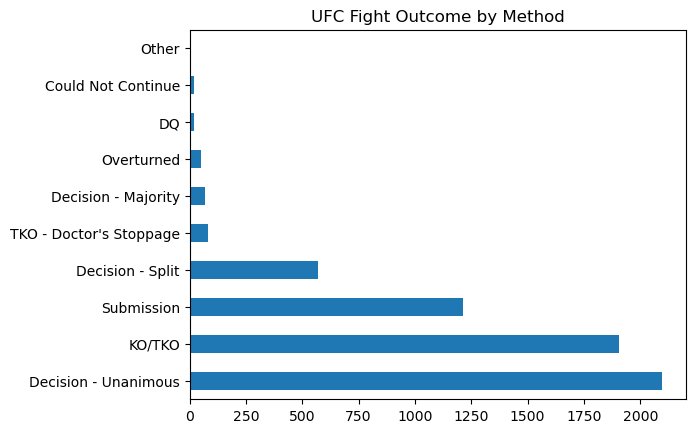

In [58]:
# create a bar chart for method in ascending order
winning_method = df_ufc_4['method'].value_counts().plot(kind='barh')
plt.title("UFC Fight Outcome by Method")

Text(0.5, 1.0, 'UFC Fight Outcome by Method')

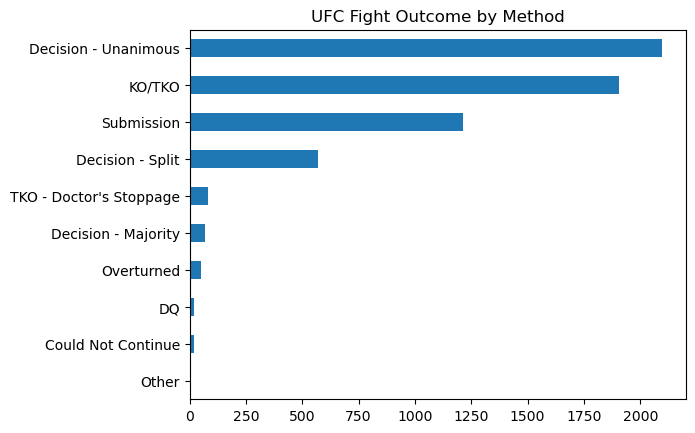

In [59]:
# create a bar chart for method in descending order
winning_method = df_ufc_4.method.value_counts().sort_values().plot(kind='barh')
plt.title("UFC Fight Outcome by Method")

In [60]:
# print the frequency of the 'method' column
df_ufc_4['method'].value_counts()

Decision - Unanimous       2097
KO/TKO                     1905
Submission                 1211
Decision - Split            568
TKO - Doctor's Stoppage      80
Decision - Majority          66
Overturned                   48
DQ                           18
Could Not Continue           17
Other                         2
Name: method, dtype: int64

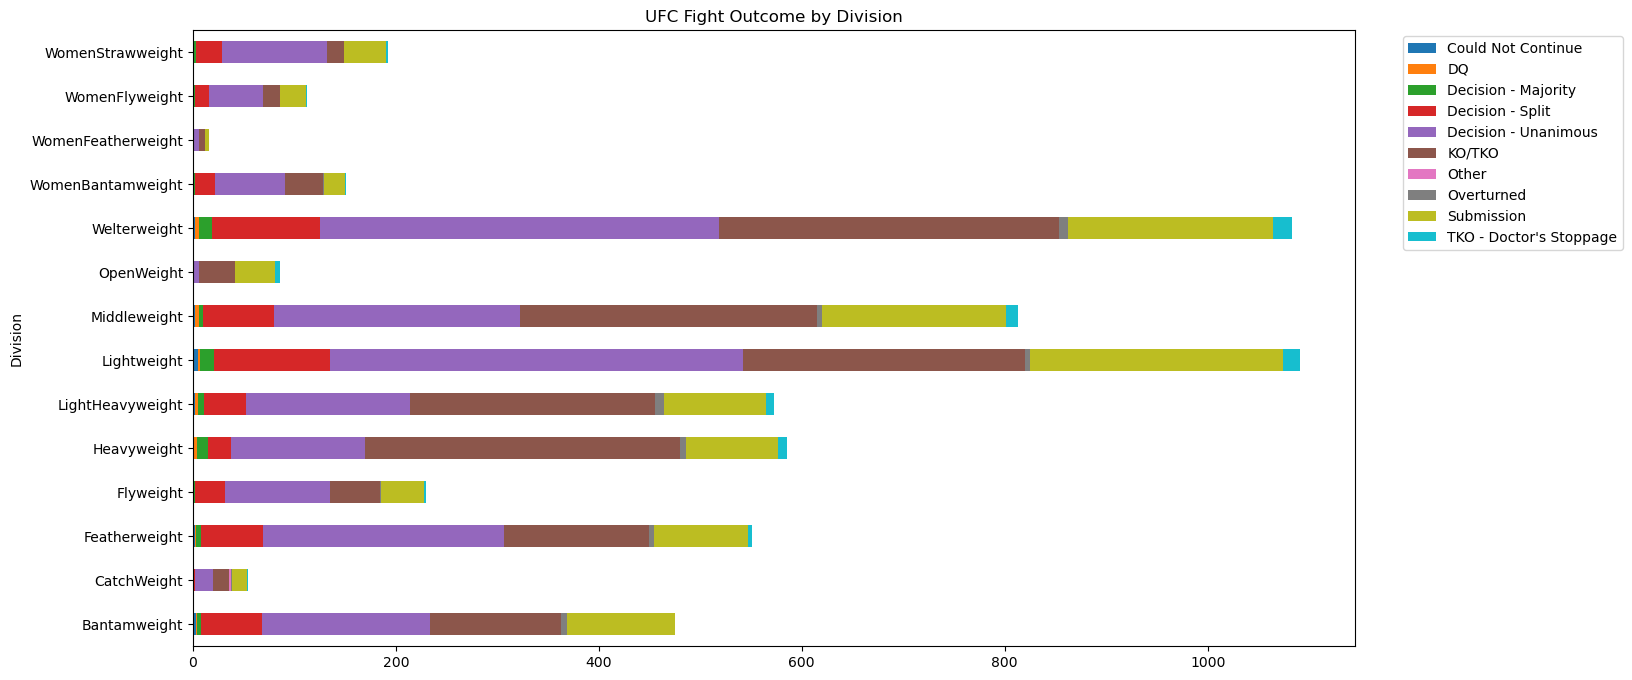

In [61]:
# create stacked bar chart for weight_class and method
bar = df_ufc_4.groupby(['weight_class', 'method']).size().reset_index().pivot(columns='method', index='weight_class', values=0)
bar.plot(kind='barh', stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.23, 0.99), loc=1, borderaxespad=0.)
plt.title('UFC Fight Outcome by Division')
plt.ylabel('Division')
plt.show()

In [62]:
# Use crosstab function for 'weight_class' and 'method' column
crosstab = pd.crosstab(df_ufc_4['weight_class'], df_ufc_4['method'], dropna = False)
crosstab

method,Could Not Continue,DQ,Decision - Majority,Decision - Split,Decision - Unanimous,KO/TKO,Other,Overturned,Submission,TKO - Doctor's Stoppage
weight_class,,,,,,,,,,
Bantamweight,3,1,4,60,166,129,0,6,106,0
CatchWeight,0,0,0,2,18,16,2,1,14,1
Featherweight,2,1,5,61,238,142,0,5,93,4
Flyweight,0,0,2,30,103,49,0,1,43,2
Heavyweight,1,3,11,23,132,310,0,6,91,8
LightHeavyweight,2,3,6,41,162,241,0,9,101,8
Lightweight,5,2,14,114,407,278,0,5,249,17
Middleweight,2,4,4,70,242,293,0,5,181,12
OpenWeight,0,0,0,0,6,35,0,0,40,5


Text(0, 0.5, 'Division')

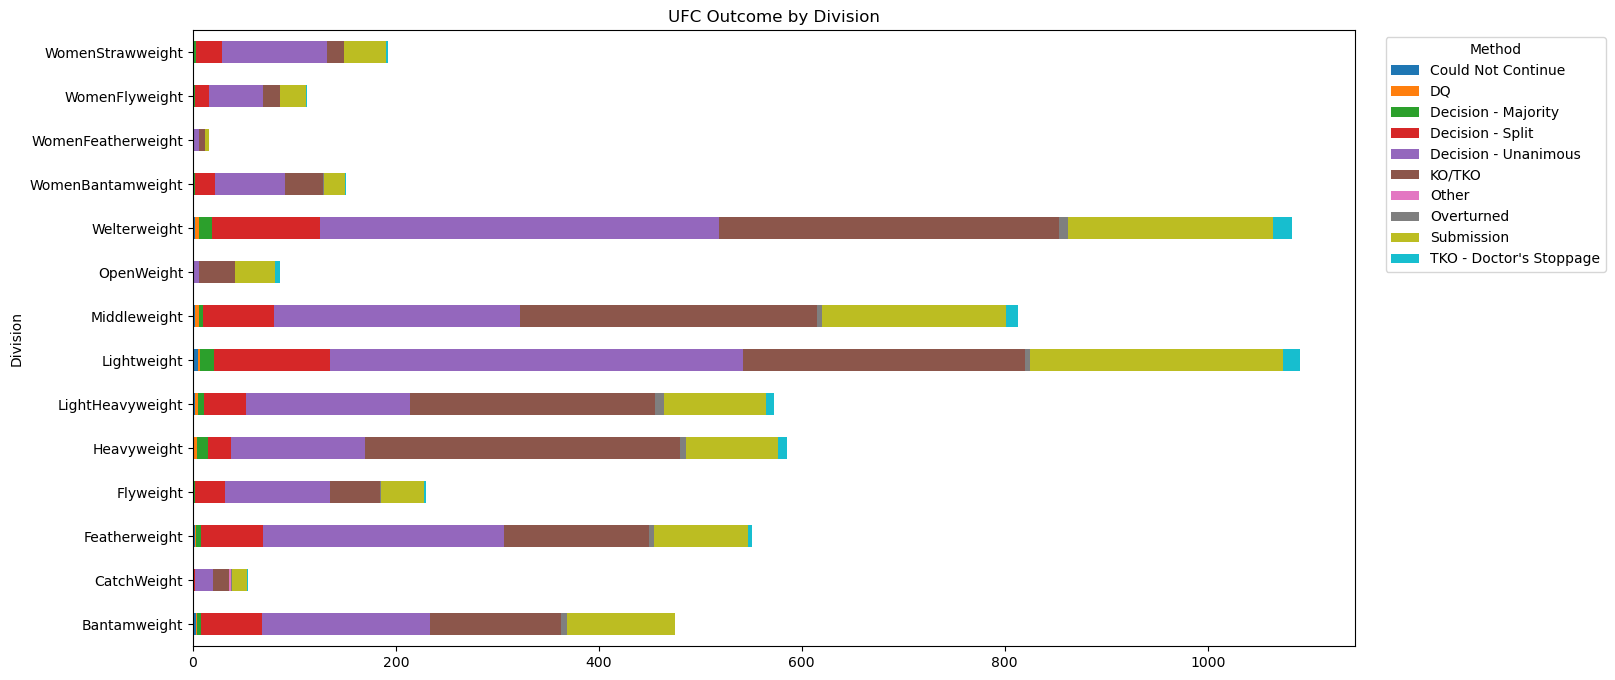

In [63]:
# create stacked bar chart for weight_class and method
stacked_bar_chart = crosstab.plot(kind="barh", stacked = True, figsize=(15,8))
plt.legend(title = 'Method', bbox_to_anchor = (1.02,1), loc='upper left')
plt.title("UFC Outcome by Division")
plt.ylabel("Division")

### Does the stance give a fighter an advantage?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Orthodox'),
  Text(1, 0, 'Southpaw'),
  Text(2, 0, 'Switch'),
  Text(3, 0, 'Open Stance'),
  Text(4, 0, 'Sideways')])

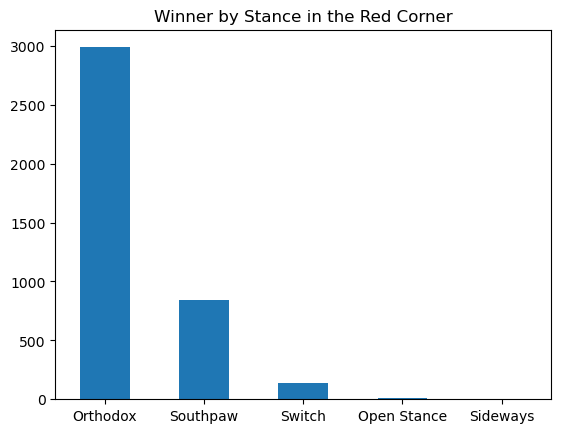

In [64]:
# create a bar chart for red winner and stance
red_stance = df_ufc_4[df_ufc_4['winner']=='Red']['R_Stance'].value_counts().plot.bar()
plt.title("Winner by Stance in the Red Corner")
plt.xticks(rotation='horizontal')

In [65]:
# print the frequency of the 'winner' and 'R_Stance' columns by red
df_ufc_4[df_ufc_4['winner']=='Red']['R_Stance'].value_counts()

Orthodox       2988
Southpaw        842
Switch          135
Open Stance      12
Sideways          2
Name: R_Stance, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Orthodox'),
  Text(1, 0, 'Southpaw'),
  Text(2, 0, 'Switch'),
  Text(3, 0, 'Open Stance')])

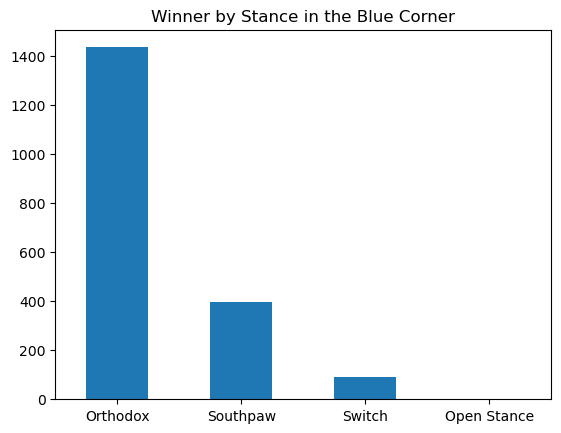

In [66]:
# create a bar chart for blue winner and stance
blue_stance = df_ufc_4[df_ufc_4['winner']=='Blue']['B_Stance'].value_counts().plot.bar()
plt.title("Winner by Stance in the Blue Corner")
plt.xticks(rotation='horizontal')

In [67]:
# print the frequency of the 'winner' and 'B_Stance' columns by blue
df_ufc_4[df_ufc_4['winner']=='Blue']['B_Stance'].value_counts()

Orthodox       1434
Southpaw        398
Switch           90
Open Stance       1
Name: B_Stance, dtype: int64

### Does age play a factor in winning a fight?

Text(0.5, 1.0, 'Age of Winner in the Red Corner')

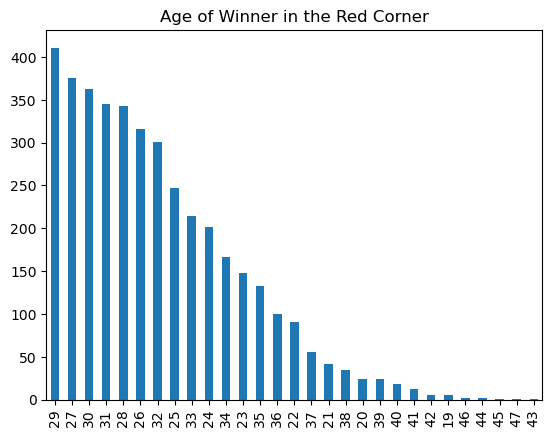

In [68]:
# create a bar chart for red winner and age
red_winner = df_ufc_4[df_ufc_4['winner']=='Red']['R_age'].value_counts().plot.bar()
plt.title("Age of Winner in the Red Corner")

In [73]:
red_winner.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'red_winner.png'))

Text(0.5, 1.0, 'Age of Winner in the Blue Corner')

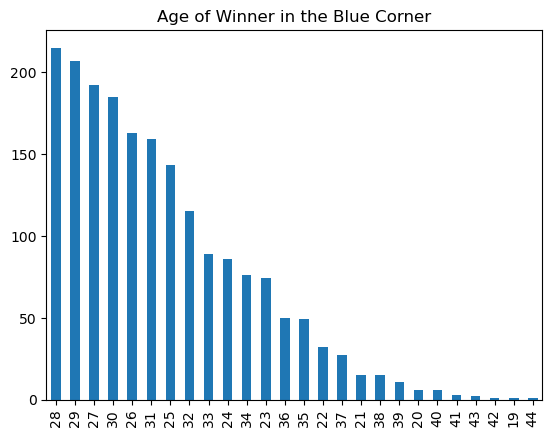

In [75]:
# create a bar chart for blue winner and age
blue_winner = df_ufc_4[df_ufc_4['winner']=='Blue']['B_age'].value_counts().plot.bar()
plt.title("Age of Winner in the Blue Corner")

In [76]:
blue_winner.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'blue_winner.png'))

In [77]:
# print the frequency of the 'winner' and 'B_age' columns by blue
df_ufc_4[df_ufc_4['winner']=='Blue']['B_age'].value_counts()

28    215
29    207
27    192
30    185
26    163
31    159
25    143
32    115
33     89
24     86
34     76
23     74
36     50
35     49
22     32
37     27
21     15
38     15
39     11
20      6
40      6
41      3
43      2
42      1
19      1
44      1
Name: B_age, dtype: int64

In [80]:
# print the frequency of the 'winner' and 'R_age' columns by red
df_ufc_4[df_ufc_4['winner']=='Red']['R_age'].value_counts()

29    411
27    376
30    362
31    345
28    343
26    316
32    301
25    247
33    214
24    201
34    167
23    148
35    132
36    100
22     90
37     55
21     41
38     35
20     24
39     24
40     18
41     12
42      5
19      5
46      2
44      2
45      1
47      1
43      1
Name: R_age, dtype: int64